In [110]:
#GYM stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
# from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines import A2C

import random
import numpy as np
import pandas as pd
import yfinance
import datetime
from matplotlib import pyplot as plt
from gym_anytrading.envs import StocksEnv
import talib as ta 

In [4]:
#simple environment. (price,diff)
env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=10)

info {'total_reward': -2105.26171875, 'total_profit': 0.6150649504924658, 'position': <Positions.Long: 1>}


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


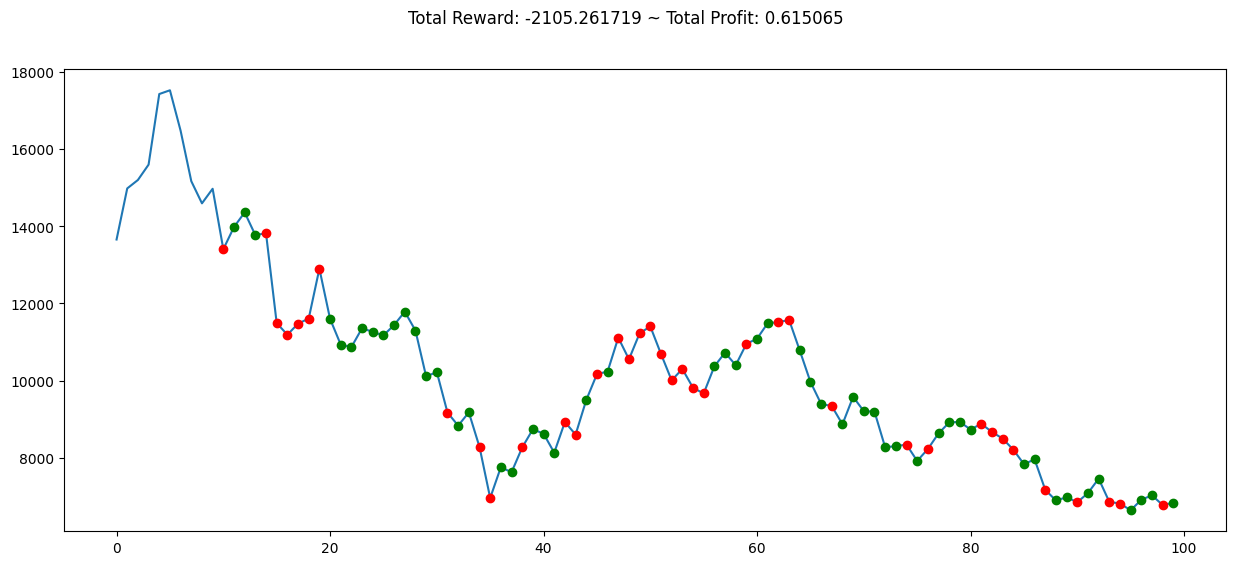

In [47]:
#testing environment
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, terminated, truncated , info = env.step(action)
    done = terminated or truncated
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [232]:
#custom environment
#data
df = yfinance.download('BTC-USD',interval = '1D',start = '2018-01-01',end = datetime.datetime.today())
data = df.copy()
EMA200 = ta.EMA(data.Close, timeperiod=30)
#bolinger bounds========
upper, middle, lower = ta.BBANDS(data.Close,timeperiod=14)
#ADX====================
ADX = ta.ADX(data.High, data.Low,data.Close, timeperiod=14) #>25 weak|25-50 strong | >50 very strong
#DMP====================
DMP =ta.PLUS_DI(data.High, data.Low, data.Close, timeperiod=14)
#DMN====================
DMM =ta.MINUS_DI(data.High, data.Low, data.Close, timeperiod=14)
#CCI====================
CCI = ta.CCI(data.High, data.Low, data.Close, timeperiod=14) #>100 strong up trend <-100 strong downtrend >200 overbough <-200 oversold
#MACD===================
macd, macdsignal, macdhist = ta.MACDEXT(data.Close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
# MFI===================
MFI = ta.MFI(data.High, data.Low, data.Close, data.Volume, timeperiod=14) #<10 oversold >90 overbought
#RSI====================
RSI = ta.RSI(data.Close, timeperiod=14) #<30 oversold >70 overbought
#MOM===================
MOM = ta. MOM(data.Close, timeperiod=10)
#ATR===================
ATR = ta.ATR(data.High, data.Low, data.Close, timeperiod=14)
#Chaikin===============
C = ta.ADOSC(data.High, data.Low, data.Close, data.Volume, fastperiod=3, slowperiod=10)
# OBV===================
OBV = ta.OBV(data.Close, data.Volume)
df = df.drop('Adj Close',axis = 'columns')

df['ema']      = np.array(EMA200)
df['BolingerP']= np.array(upper)    
df['BolingerM']= np.array(lower)    
df['ADX']      = np.array(ADX) 
df['DMI']      = np.array(DMP-DMM)
df['CCI']      = np.array(CCI)
df['MACDH']    = np.array(macdhist)
df['MACDS']    = np.array(macd+macdsignal)
df['MFI']      = np.array(MFI)
df['RSI']      = np.array(RSI)
df['MOM']      = np.array(MOM)
df['ATR']      = np.array(ATR)
df['Chaikin']  = np.array(C)
df['OBV']      = np.array(OBV)
df = df.dropna()


[*********************100%%**********************]  1 of 1 completed


In [248]:
#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaled = scaler.fit_transform(df)
for col in df.columns:
    # print(df[col].values,df[col].values.reshape(-1,1))
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
df

,Open,High,Low,Close,Volume,ema,BolingerP,BolingerM,ADX,DMI,CCI,MACDH,MACDS,MFI,RSI,MOM,ATR,Chaikin,OBV
Date,,,,,,,,,,,,,,,,,,,
2018-02-03,0.080407,0.087342,0.074261,0.085017,0.012470,0.146186,0.125750,0.094909,0.428977,0.260984,0.359299,0.627674,0.434277,0.297336,0.318077,0.490502,0.236218,0.369334,0.006328
2018-02-04,0.085040,0.085981,0.071026,0.072162,0.011923,0.141847,0.126342,0.086378,0.445440,0.265447,0.363788,0.621460,0.437599,0.313259,0.271632,0.469953,0.237236,0.366025,0.003592
2018-02-05,0.072080,0.072217,0.052322,0.053238,0.018278,0.136354,0.130927,0.071619,0.469427,0.222694,0.329632,0.602240,0.438219,0.327555,0.215188,0.438179,0.242588,0.352634,0.000000
2018-02-06,0.054629,0.064921,0.041926,0.064674,0.031824,0.132082,0.130880,0.064330,0.495789,0.213760,0.364909,0.584236,0.437456,0.328549,0.291840,0.451814,0.250369,0.369268,0.005416
2018-02-07,0.064705,0.074264,0.059368,0.062774,0.017945,0.127941,0.128553,0.058249,0.506098,0.261548,0.418083,0.572878,0.436696,0.306692,0.285614,0.439495,0.249923,0.369426,0.001869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,0.975781,0.980235,0.916302,0.947317,0.216630,0.983777,0.999042,0.966267,0.742892,0.544884,0.567215,0.617115,0.996661,0.640160,0.691255,0.691053,0.677703,0.660096,0.655584
2024-03-16,0.947212,0.947445,0.904132,0.888780,0.126187,0.987273,0.992670,0.981495,0.700771,0.521994,0.478741,0.497753,0.972858,0.618793,0.554773,0.526373,0.704223,0.563185,0.637464
2024-03-17,0.888850,0.930410,0.900374,0.932812,0.120080,0.993880,0.987400,1.000000,0.659689,0.512442,0.478831,0.467601,0.963997,0.628196,0.621746,0.584496,0.715180,0.564962,0.654762


In [249]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, df.drop('Close',axis = 'columns').columns].to_numpy()[start:end]
    return prices, signal_features

In [250]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=10, frame_bound=(10,50))

In [ ]:
#build environment


In [251]:
#deep q network
import tensorflow as tf
from tensorflow import keras
from collections import deque
input_shape = env2.observation_space.shape
num_actions = env2.action_space.n
num_episodes = 3 #1000
epsilon = 1
gamma = 0.9
state = env2.reset()
batch = 1 #200
replay = deque(maxlen=2000)
epoch = 0
alpha = 0.1
input_shape,num_actions

((10, 18), 2)

In [252]:
#network
value_network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_shape)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_actions,activation='linear')
])

# Set up the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
#value_network = tf.keras.models.load_model('keras')

In [253]:
for episode in range(num_episodes):
    state,info = env2.reset()
    print(np.array([state]).shape)
    # Run the episode
    while True:
        # print(input_shape,env.observation_space,np.array(state).shape)
        value_function = value_network.predict(tf.convert_to_tensor([state]),verbose=0)[0]
        
        if np.random.rand()>epsilon:
            action = np.argmax(value_function)
        else:
            action = np.random.choice(num_actions)


        next_state, reward, terminated, truncated, _ = env2.step(action)
        done = terminated or truncated
        done = 1 if done else 0
        # print(state)
        replay.append((state,action,reward,next_state,done))
        state = next_state


        if done:        
            break
    
        if len(replay)>batch:
            print('************************here******************','\n')
            with tf.GradientTape() as tape:
                batch_ = random.sample(replay,batch)
                q_value1 = value_network(tf.convert_to_tensor([x[0] for x in batch_]))
                q_value2 = value_network(tf.convert_to_tensor([x[3] for x in batch_]))
                
                reward = tf.convert_to_tensor([x[2] for x in batch_])
                action = tf.convert_to_tensor([x[1] for x in batch_])
                done =   tf.convert_to_tensor([x[4] for x in batch_])
      
                print('=============','\n',tf.convert_to_tensor([x[0] for x in batch_]),value_network(tf.convert_to_tensor([x[0] for x in batch_])))
                actual_q_value1 = tf.cast(reward,tf.float64) + tf.cast(tf.constant(alpha),tf.float64)*(tf.cast(tf.constant(gamma),tf.float64)*tf.cast((tf.constant(1)-done),tf.float64)*tf.cast(tf.reduce_max(q_value2),tf.float64))           
                loss = tf.cast(tf.gather(q_value1,action,axis=1,batch_dims=1),tf.float64)
                # print(loss,'loss========',actual_q_value1)
                # actual_q_value1_reshaped = tf.reshape(actual_q_value1, (batch, -1))  # Adjust the shape as needed

                # Perform element-wise subtraction

                loss = loss - actual_q_value1
                # loss = loss - actual_q_value1
                loss = tf.reduce_mean(tf.math.pow(loss,2))

        
                grads = tape.gradient(loss, value_network.trainable_variables)
                optimizer.apply_gradients(zip(grads, value_network.trainable_variables))

                print('Epoch {} done with loss {} !!!!!!'.format(epoch,loss))

                value_network.save('keras/')
                if epoch%100==0:
                    epsilon*=0.999
                epoch+=1

(1, 10, 18)
************************here****************** 

 tf.Tensor(
[[[0.08503955 0.08598111 0.0710261  0.01192343 0.14184711 0.12634209
   0.08637765 0.44543989 0.26544744 0.36378755 0.62146042 0.43759854
   0.31325874 0.27163211 0.46995273 0.23723615 0.36602527 0.00359183]
  [0.07207964 0.07221687 0.05232214 0.01827819 0.13635393 0.13092676
   0.07161852 0.46942726 0.22269437 0.32963194 0.60223956 0.43821901
   0.32755542 0.21518789 0.43817852 0.24258801 0.3526338  0.        ]
  [0.05462924 0.06492149 0.04192602 0.03182391 0.13208159 0.13088026
   0.06432956 0.49578943 0.21376009 0.36490872 0.58423616 0.4374556
   0.32854937 0.29183967 0.45181367 0.2503692  0.36926812 0.00541555]
  [0.06470525 0.074264   0.05936779 0.01794487 0.12794093 0.12855251
   0.05824879 0.50609848 0.26154772 0.41808288 0.5728783  0.43669582
   0.30669225 0.28561423 0.43949535 0.24992277 0.36942622 0.00186859]
  [0.06302105 0.07496864 0.06525351 0.01845478 0.12476633 0.12468102
   0.05573578 0.51461245 0.

Exception ignored in: <function UniquePtr.__del__ at 0x0000026F45BAC040>
Traceback (most recent call last):
  File "c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 71, in __del__
    obj = self._obj
AttributeError: 'ScopedTFGraph' object has no attribute '_obj'


INFO:tensorflow:Assets written to: keras/assets
************************here****************** 

 tf.Tensor(
[[[0.11447838 0.12320908 0.11799482 0.02012063 0.11553428 0.11701675
   0.06713492 0.29943279 0.52578283 0.68047129 0.72345283 0.50778246
   0.80414561 0.60429511 0.61840591 0.18734366 0.40904781 0.01910272]
  [0.11648861 0.11554676 0.1069489  0.01862312 0.11579046 0.11768162
   0.07359092 0.27100165 0.4758573  0.61607322 0.71874408 0.52120172
   0.70935063 0.53962715 0.61270467 0.18658109 0.39081538 0.01546445]
  [0.1062972  0.11016326 0.09902422 0.01470046 0.11528662 0.11734393
   0.07808888 0.24486576 0.44226787 0.5675716  0.71080873 0.53465963
   0.63011153 0.48379895 0.57453666 0.1881973  0.36892221 0.0123543 ]
  [0.0959407  0.1023335  0.09602272 0.01383683 0.11513648 0.11774153
   0.08131008 0.22413922 0.43077585 0.54757868 0.71085651 0.55079094
   0.56186069 0.50760989 0.59061668 0.18467244 0.36608758 0.01534818]
  [0.10096095 0.10389293 0.09326983 0.0114763  0.11446663 0